Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

Задание 3 Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

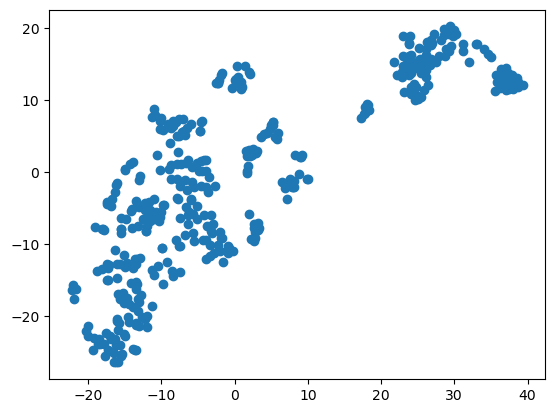

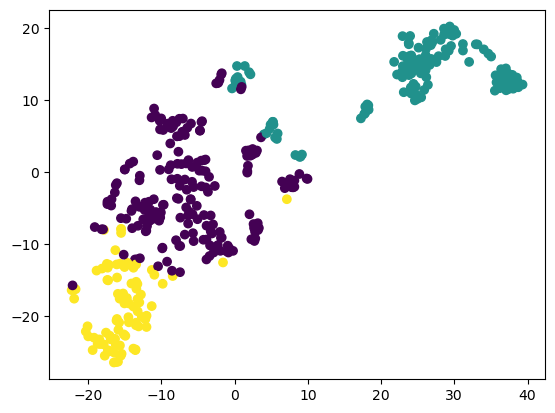

Средние значения price в кластерах:
0    24.958115
1    16.165354
2    27.788372
Name: price, dtype: float64

Средние значения CRIM в кластерах:
0     0.421660
1    10.797028
2     0.073566
Name: CRIM, dtype: float64

Средние значения price в кластерах на тестовых данных:
0    21.860784
1    16.437143
2    31.350000
Name: price, dtype: float64

Средние значения CRIM в кластерах на тестовых данных:
0     0.266079
1    10.165531
2     0.062060
Name: CRIM, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Загрузка данных
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='price')

# Разбиение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Построение диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Кластеризация данных с помощью KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
y_train_clusters = kmeans.fit_predict(X_train_scaled)

# Построение диаграммы рассеяния с раскраской точек по кластерам
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_clusters)
plt.show()

# Вычисление средних значений price и CRIM в разных кластерах
cluster_prices = y_train.groupby(y_train_clusters).mean()
cluster_crimes = X_train['CRIM'].groupby(y_train_clusters).mean()
print("Средние значения price в кластерах:")
print(cluster_prices)
print("\nСредние значения CRIM в кластерах:")
print(cluster_crimes)

# Применение модели KMeans к тестовым данным
y_test_clusters = kmeans.predict(X_test_scaled)

# Вычисление средних значений price и CRIM в разных кластерах на тестовых данных
cluster_prices_test = y_test.groupby(y_test_clusters).mean()
cluster_crimes_test = X_test['CRIM'].groupby(y_test_clusters).mean()
print("\nСредние значения price в кластерах на тестовых данных:")
print(cluster_prices_test)
print("\nСредние значения CRIM в кластерах на тестовых данных:")
print(cluster_crimes_test)